In [0]:
from google.colab import files
files.upload()

In [2]:
!unzip pulsar_stars.csv.zip

Archive:  pulsar_stars.csv.zip
  inflating: pulsar_stars.csv        


In [0]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
data=pd.read_csv('pulsar_stars.csv')

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


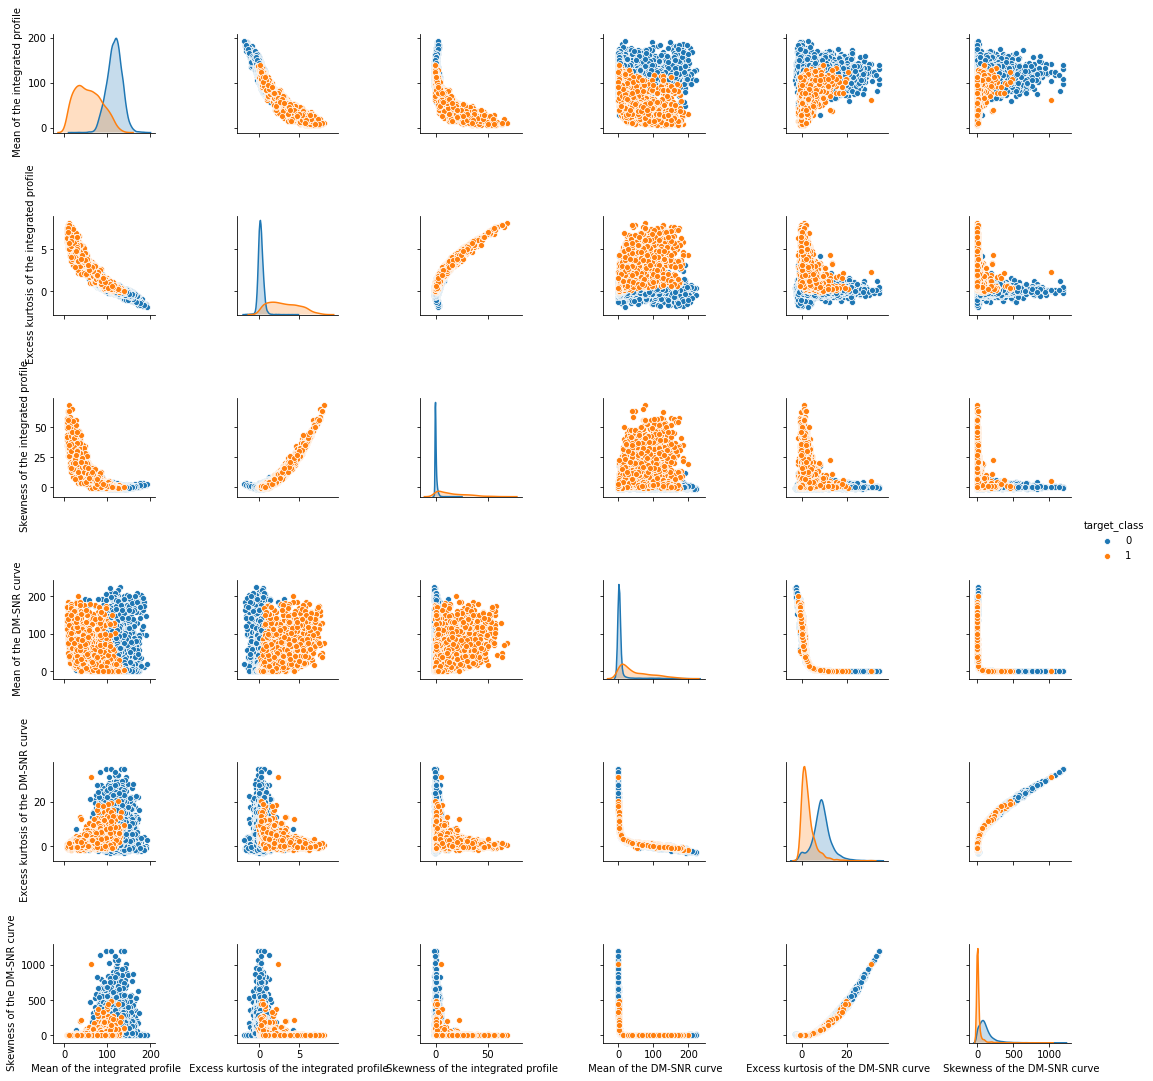

In [6]:
sb.pairplot(data=data,hue="target_class",vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])


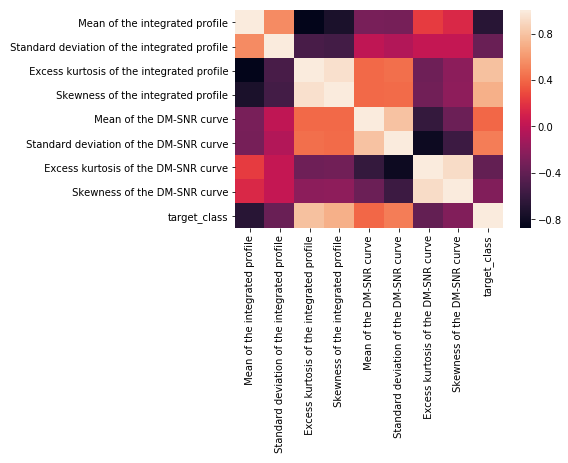

In [7]:
sb.heatmap(data=data.corr())

In [0]:
train=data.sample(frac=0.8)
test=data.drop(train.index)

In [0]:
train_y=train['target_class']
train_x=train.drop(['target_class'],axis=1)
test_y=test['target_class']
test_x=test.drop(['target_class'],axis=1)

In [0]:
for i in data:
  if(data[i].isnull().sum()>0):
    print(i,":",data[i].isnull().sum())

In [0]:
from sklearn.naive_bayes import GaussianNB as gnb
nb=gnb()
nb.fit(train_x,train_y)
k=nb.predict(test_x)
nbs=nb.score(test_x,test_y)

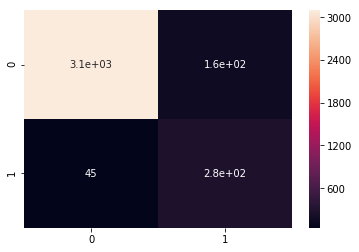

In [12]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(test_y,k)
sb.heatmap(cm,annot=True)


In [0]:
from sklearn.svm import SVC
svm= SVC(random_state=100,C=400,gamma=2.0,probability=True)
svm.fit(train_x,train_y)
k1= svm.predict(test_x)
svms=svm.score(test_x,test_y)

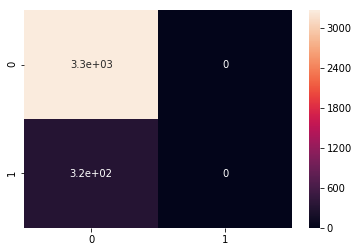

In [14]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(test_y,k1)
sb.heatmap(cm,annot=True)


([<matplotlib.axis.XTick at 0x7f87ffd4e748>,
 <a list of 2 Text xticklabel objects>)

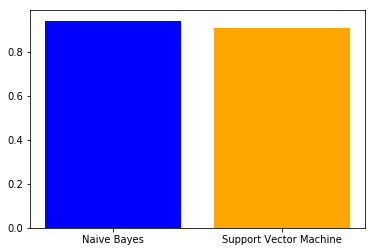

In [17]:
name=('Naive Bayes',"Support Vector Machine")
loc=(1,2)
s=(nbs,svms)
c=("blue","orange")
plt.bar(loc,s,color=c)
plt.xticks(loc,name)